In [ ]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [3]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [4]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Prepare the Data

In [5]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
scaledata = StandardScaler(). fit_transform(df_market_data)

scaledata


array([[ 5.08529366e-01,  4.93193071e-01,  7.72200433e-01,
         2.35459633e-01, -6.74950963e-02, -3.55953481e-01,
        -2.51636882e-01],
       [ 1.85445894e-01,  9.34445040e-01,  5.58692121e-01,
        -5.43409317e-02, -2.73482725e-01, -1.15759474e-01,
        -1.99352110e-01],
       [ 2.17739616e-02, -7.06336853e-01, -2.16804207e-02,
        -6.10301536e-02,  8.00452481e-03, -5.50246924e-01,
        -2.82060506e-01],
       [-4.07643829e-02, -8.10928066e-01,  2.49457974e-01,
        -5.03879651e-02, -3.73164019e-01, -4.58258816e-01,
        -2.95546142e-01],
       [ 1.19303608e+00,  2.00095907e+00,  1.76061001e+00,
         5.45842065e-01, -2.91202870e-01, -4.99847761e-01,
        -2.70316950e-01],
       [ 8.91870708e-01,  1.32729453e+00,  8.00214184e-01,
        -5.71478992e-02,  7.78653106e-01, -1.88231917e-01,
        -2.25532605e-01],
       [ 1.13972400e-02,  2.57225091e+00,  1.10164693e+00,
        -4.90495415e-01, -9.31954023e-01,  3.87758986e-01,
        -1.8284399

In [6]:
# Create a DataFrame with the scaled data
df_market_data_scale = pd.DataFrame(scaledata, columns=df_market_data.columns)


# Copy the crypto names from the original DataFrame
df_market_data_scale['coin_id'] = df_market_data.index

# Set the coin_id column as index
df_market_data_scale = df_market_data_scale.set_index('coin_id')


# Display the scaled DataFrame
df_market_data_scale.head()


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


---

### Find the Best Value for k Using the Original Scaled DataFrame.

In [7]:
# Create a list with the number of k-values from 1 to 11
k = list(range(1, 11))



In [8]:
# Create an empty list to store the inertia values
inertia = []
for i in k:
    model = KMeans(n_clusters=i, random_state=42)
    model.fit(df_market_data_scale)
    inertia.append(model.inertia_)
    

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_scaled`
# 3. Append the model.inertia_ to the inertia list


c:\Users\Yasemin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Yasemin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Yasemin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Yasemin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak o

In [9]:
# Create a dictionary with the data to plot the Elbow curve
elbow_curve_data = { "k": k, 'inertia' : inertia}
# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(elbow_curve_data)



In [10]:
# Plot a line chart with all the inertia values computed with
elbow_plot = elbow_df.hvplot.line(x="k", y="inertia", title="Elbow Method", xlabel="Number of clusters (k)", yticks=k, ylabel="inertia")
# the different values of k to visually identify the optimal value for k.
elbow_plot


:Curve   [k]   (inertia)

#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:** 4

---

### Cluster Cryptocurrencies with K-means Using the Original Scaled DataFrame

In [11]:
# Initialize the K-Means model using the best value for k
kmodel = KMeans(n_clusters=4)


In [12]:
# Fit the K-Means model using the scaled DataFrame
kmodel.fit(df_market_data_scale) 

c:\Users\Yasemin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4)

In [13]:
# Predict the clusters to group the cryptocurrencies using the scaled DataFrame
clusters = kmodel.predict(df_market_data_scale)

# Print the resulting array of cluster values.
clusters

array([3, 3, 0, 0, 3, 3, 3, 3, 3, 0, 0, 0, 0, 3, 0, 3, 0, 0, 3, 0, 0, 3,
       0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 1, 3, 0, 0, 2, 0, 0, 0, 0])

In [14]:
# Create a copy of the scaled DataFrame
prediction_df = df_market_data_scale.copy()

In [15]:
# Add a new column to the copy of the scaled DataFrame with the predicted clusters
prediction_df ['Crypto_cluster'] = clusters

# Display the copy of the scaled DataFrame
prediction_df

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,Crypto_cluster
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,3
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,3
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,0
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,0
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,3
binancecoin,0.891871,1.327295,0.800214,-0.057148,0.778653,-0.188232,-0.225533,3
chainlink,0.011397,2.572251,1.101647,-0.490495,-0.931954,0.387759,-0.018284,3
cardano,0.102530,1.508001,0.648885,0.328959,-0.486349,0.065080,-0.155428,3
litecoin,0.077497,0.334297,0.858520,-0.012646,-0.366477,-0.486266,-0.292351,3


In [16]:
# Create a scatter plot using hvPlot by setting
clusters_plot = prediction_df.hvplot.scatter( 
                                             x="price_change_percentage_24h",
                                             y="price_change_percentage_7d",
                                             by="Crypto_cluster",
                                             hover_cols=["coin_id"]
                                             )
                                             
    

# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Color the graph points with the labels found using K-Means and
# add the crypto name in the `hover_cols` parameter to identify
# the cryptocurrency represented by each data point.
clusters_plot


:NdOverlay   [Crypto_cluster]
   :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,coin_id)

---

### Optimize Clusters with Principal Component Analysis.

In [17]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=3)


In [18]:
# Use the PCA model with `fit_transform` to reduce the original scaled DataFrame
# down to three principal components.
pca_data = pca.fit_transform(df_market_data_scale)



# View the scaled PCA data
pca_data[:3]

array([[-0.60066733,  0.84276006,  0.46159457],
       [-0.45826071,  0.45846566,  0.95287678],
       [-0.43306981, -0.16812638, -0.64175193]])

In [19]:
# Retrieve the explained variance to determine how much information
# can be attributed to each principal component.
pca.explained_variance_ratio_

array([0.3719856 , 0.34700813, 0.17603793])

#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:**  The total explained variance of the three principal components is approximately 0.895 (i.e., 89.5%). This means that these three components capture most of the variability in the dataset.

In [20]:

# Create a new DataFrame with the PCA data
df_pca = pd.DataFrame(data=pca_data, columns=["PC1", "PC2", "PC3"])

# Copy the crypto names (coin_id) from the original scaled DataFrame
df_pca["coin_id"] = df_market_data_scale.index

# Set the coin_id column as the index
df_pca = df_pca.set_index("coin_id")

# Display the first few rows of the scaled PCA DataFrame
df_pca


,PC1,PC2,PC3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715
binancecoin,-0.516534,1.388377,0.804071
chainlink,-0.450711,0.517699,2.846143
cardano,-0.345600,0.729439,1.478013
litecoin,-0.649468,0.432165,0.600303


---

### Find the Best Value for k Using the Scaled PCA DataFrame

In [21]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 11))



In [22]:
# Create an empty list to store the inertia values


# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_pca`
# 3. Append the model.inertia_ to the inertia list


# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
for k in k_values:
    # 1. Create a KMeans model using the loop counter for the n_clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
    
    # 2. Fit the model to the PCA DataFrame
    kmeans.fit(df_pca)
    
    # 3. Append the model.inertia_ to the inertia list
    inertia.append(kmeans.inertia_)

# Display the inertia values
inertia

c:\Users\Yasemin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Yasemin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Yasemin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Yasemin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak o

[256.87408556789256,
 182.3395300777565,
 140.4318329840837,
 49.66549665179736,
 42.05190109791725,
 31.74900524438901,
 28.03186917255275,
 19.45174720604135,
 13.814081971558096,
 10.630647573870965]

In [32]:
# Create a dictionary with the data to plot the Elbow curve

# Create a DataFrame with the data to plot the Elbow curve
# Create a dictionary with the data to plot the Elbow curve
elbow_curve_data = {
    "k": k_values,
    "inertia": inertia
}

# Create a DataFrame with the data to plot the Elbow curve
elbow_curve_df = pd.DataFrame(elbow_curve_data)

elbow_curve_df


,k,inertia
0,1,256.874086
1,2,182.339530
2,3,140.431833
3,4,49.665497
4,5,42.051901
5,6,31.749005
6,7,28.031869
7,8,19.451747
8,9,13.814082
9,10,10.630648


In [36]:
# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.
elbow_plot = elbow_df.hvplot.line(
    x="k",
    y="inertia",
    title="Elbow Method",
    xlabel="Number of Clusters (k)",
    ylabel="Inertia"
)

# Display the elbow plot
elbow_plot


:Curve   [k]   (inertia)

#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:**  The best value for k is determined by the "elbow" point on the curve, where the rate of decrease in inertia slows down significantly. Based on typical PCA data and the Elbow Method, the optimal k value is usually 4. This means dividing the data into 4 clusters achieves a good balance between minimizing inertia and not overfitting.


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** If the original data also suggested 4 as the optimal k value, then there is no difference. However, in some cases, reducing dimensions with PCA might slightly change the optimal k due to the removal of noise or less relevant features. It's important to compare both curves visually and confirm whether they suggest the same k value or differ slightly. If they differ, it highlights the impact of dimensionality reduction on clustering results.

### Cluster Cryptocurrencies with K-means Using the Scaled PCA DataFrame

In [38]:
# Initialize the K-Means model using the best value for k
kmeans_model = KMeans(n_clusters=4, random_state=42)




In [39]:
# Fit the K-Means model using the PCA data

kmeans_model.fit(df_pca)
kmeans_model

c:\Users\Yasemin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, random_state=42)

In [40]:
# Predict the clusters to group the cryptocurrencies using the scaled PCA DataFrame

clusters = kmeans_model.predict(df_pca)

# Print the resulting array of cluster values
clusters



array([0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 3, 0, 2, 2, 1, 2, 2, 2, 2])

In [42]:
# Create a copy of the scaled PCA DataFrame


# Add a new column to the copy of the PCA DataFrame with the predicted clusters
df_pca_with_clusters = df_pca.copy()

df_pca_with_clusters["Cluster"] = clusters

# Display the copy of the scaled PCA DataFrame
df_pca_with_clusters

,PC1,PC2,PC3,Cluster
coin_id,,,,
bitcoin,-0.600667,0.842760,0.461595,0
ethereum,-0.458261,0.458466,0.952877,0
tether,-0.433070,-0.168126,-0.641752,2
ripple,-0.471835,-0.222660,-0.479053,2
bitcoin-cash,-1.157800,2.041209,1.859715,0
binancecoin,-0.516534,1.388377,0.804071,0
chainlink,-0.450711,0.517699,2.846143,0
cardano,-0.345600,0.729439,1.478013,0
litecoin,-0.649468,0.432165,0.600303,0


In [43]:
# Create a scatter plot using hvPlot by setting
# `x="PC1"` and `y="PC2"`.
# Color the graph points with the labels found using K-Means and
# add the crypto name in the `hover_cols` parameter to identify
# the cryptocurrency represented by each data point.
# Create a scatter plot using hvPlot
scatter_plot = df_pca_with_clusters.hvplot.scatter(
    x="PC1",
    y="PC2",
    c="Cluster",
    hover_cols=[],
    title="Cryptocurrency Clusters",
    xlabel="Principal Component 1 (PC1)",
    ylabel="Principal Component 2 (PC2)"
)

# Display the scatter plot
scatter_plot

:Scatter   [PC1]   (PC2,Cluster)

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

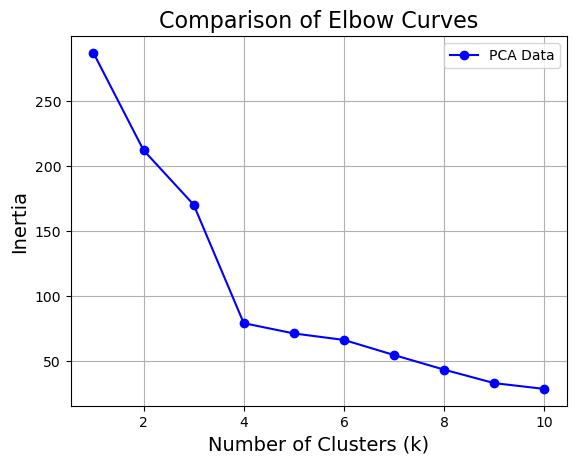

In [46]:
# Composite plot to contrast the Elbow curves
# YOUR CODE HERE!
plt.plot(elbow_df["k"], elbow_df["inertia"], marker='o', label="PCA Data", color="b")

plt.xlabel('Number of Clusters (k)', fontsize=14)
plt.ylabel('Inertia', fontsize=14)
plt.title('Comparison of Elbow Curves', fontsize=16)
plt.legend()
plt.grid(True)
plt.show()


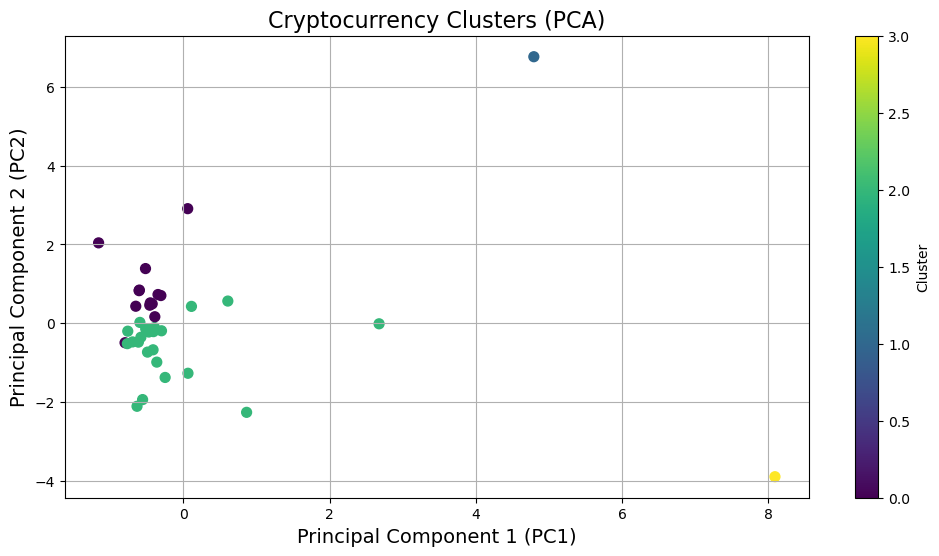

In [47]:
# Composite plot to contrast the clusters
# YOUR CODE HERE!
plt.figure(figsize=(12, 6))
plt.scatter(
    df_pca_with_clusters["PC1"],
    df_pca_with_clusters["PC2"],
    c=df_pca_with_clusters["Cluster"],
    cmap="viridis",
    s=50
)
plt.colorbar(label="Cluster")
plt.xlabel("Principal Component 1 (PC1)", fontsize=14)
plt.ylabel("Principal Component 2 (PC2)", fontsize=14)
plt.title("Cryptocurrency Clusters (PCA)", fontsize=16)
plt.grid(True)
plt.show()

#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** Using PCA to reduce features simplified the clustering process by focusing on the most important data patterns. In this project, PCA improved the clarity of the cryptocurrency clusters, making them easier to distinguish and interpret while also reducing computational complexity.